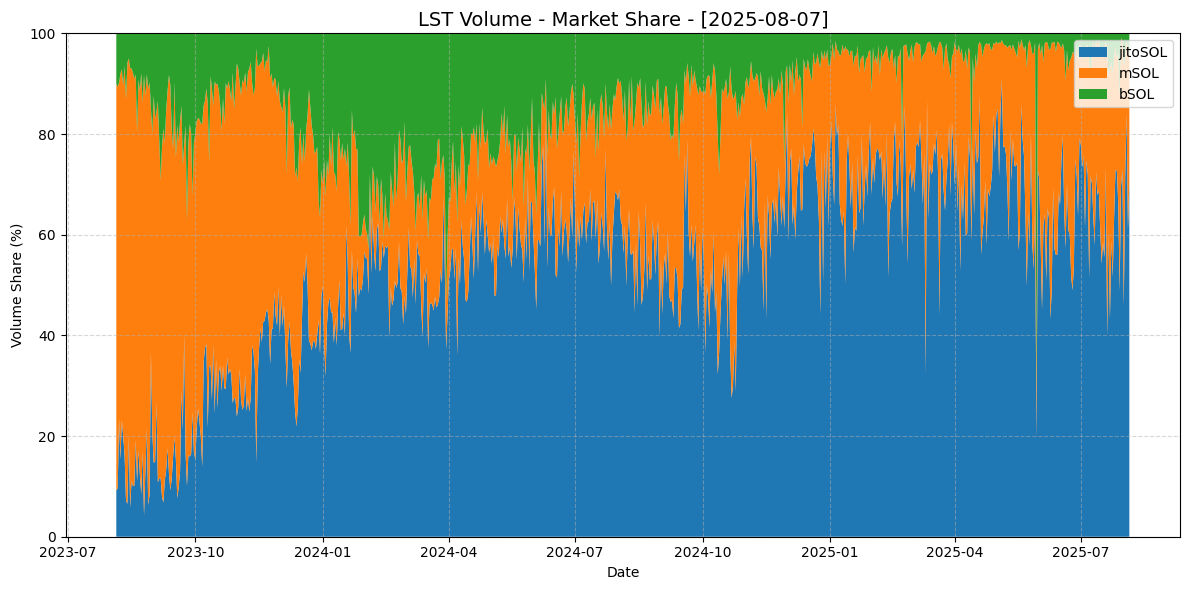

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("lst-metrics.csv")
df['time_bucket'] = pd.to_datetime(df['time_bucket']).dt.date
df_daily = df.groupby('time_bucket').agg({
    'bSOL_volume': 'sum',
    'jitoSOL_volume': 'sum', 
    'mSOL_volume': 'sum'
}).reset_index()

df_daily['total_volume'] = df_daily['bSOL_volume'] + df_daily['jitoSOL_volume'] + df_daily['mSOL_volume']
df_daily['jitoSOL_share'] = (df_daily['jitoSOL_volume'] / df_daily['total_volume']) * 100
df_daily['mSOL_share'] = (df_daily['mSOL_volume'] / df_daily['total_volume']) * 100
df_daily['bSOL_share'] = (df_daily['bSOL_volume'] / df_daily['total_volume']) * 100

df_daily = df_daily.sort_values('time_bucket')

plt.figure(figsize=(12, 6))
plt.stackplot(df_daily['time_bucket'], 
              df_daily['jitoSOL_share'], 
              df_daily['mSOL_share'], 
              df_daily['bSOL_share'],
              labels=['jitoSOL', 'mSOL', 'bSOL'],
              colors=['C0', 'C1', 'C2'])

plt.title("LST Volume - Market Share - [2025-08-07]", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volume Share (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [34]:
import pandas as pd

df = pd.read_csv("lst-metrics.csv")
df['time_bucket'] = pd.to_datetime(df['time_bucket'])
df_daily = df.groupby(df['time_bucket'].dt.date).agg({
    'bSOL_volume': 'sum',
    'jitoSOL_volume': 'sum', 
    'mSOL_volume': 'sum'
}).reset_index()

df_daily['total_volume'] = df_daily['bSOL_volume'] + df_daily['jitoSOL_volume'] + df_daily['mSOL_volume']
df_daily['jitoSOL_share'] = (df_daily['jitoSOL_volume'] / df_daily['total_volume']) * 100
df_daily['mSOL_share'] = (df_daily['mSOL_volume'] / df_daily['total_volume']) * 100
df_daily['bSOL_share'] = (df_daily['bSOL_volume'] / df_daily['total_volume']) * 100

latest_date = df['time_bucket'].dt.strftime('%b. %-d, %Y').iloc[-1]
start_date = df['time_bucket'].dt.strftime('%b. %-d, %Y').iloc[0]
timeframe_label = f"{start_date} – {latest_date}"

summary = pd.DataFrame({
    "Timeframe": [timeframe_label] * 3,
    "Total Volume ($)": [
        f"${df_daily['jitoSOL_volume'].sum():,.0f}",
        f"${df_daily['mSOL_volume'].sum():,.0f}",
        f"${df_daily['bSOL_volume'].sum():,.0f}"
    ],
    "Avg Daily Volume ($)": [
        f"${df_daily['jitoSOL_volume'].mean():,.0f}",
        f"${df_daily['mSOL_volume'].mean():,.0f}",
        f"${df_daily['bSOL_volume'].mean():,.0f}"
    ],
    "Peak Daily Volume ($)": [
        f"${df_daily['jitoSOL_volume'].max():,.0f}",
        f"${df_daily['mSOL_volume'].max():,.0f}",
        f"${df_daily['bSOL_volume'].max():,.0f}"
    ],
    "Mean Market Share (%)": [
        f"{df_daily['jitoSOL_share'].mean():.1f}%",
        f"{df_daily['mSOL_share'].mean():.1f}%",
        f"{df_daily['bSOL_share'].mean():.1f}%"
    ],
    "Peak Market Share (%)": [
        f"{df_daily['jitoSOL_share'].max():.1f}%",
        f"{df_daily['mSOL_share'].max():.1f}%",
        f"{df_daily['bSOL_share'].max():.1f}%"
    ],
    "Days Active": [
        f"{(df_daily['jitoSOL_volume'] > 0).sum():,}",
        f"{(df_daily['mSOL_volume'] > 0).sum():,}",
        f"{(df_daily['bSOL_volume'] > 0).sum():,}"
    ]
}, index=["jitoSOL", "mSOL", "bSOL"])

summary.style.set_properties(**{'text-align': 'left'}).set_table_styles([
    {"selector": "th", "props": [("text-align", "left")]}
])

,Timeframe,Total Volume ($),Avg Daily Volume ($),Peak Daily Volume ($),Mean Market Share (%),Peak Market Share (%),Days Active
jitoSOL,"Aug. 5, 2023 – Aug. 5, 2025","$25,845,371,241","$35,307,884","$387,552,375",54.1%,90.9%,732
mSOL,"Aug. 5, 2023 – Aug. 5, 2025","$11,649,940,407","$15,915,219","$214,917,875",32.2%,87.6%,732
bSOL,"Aug. 5, 2023 – Aug. 5, 2025","$6,576,329,546","$8,984,057","$119,908,086",13.7%,71.8%,732


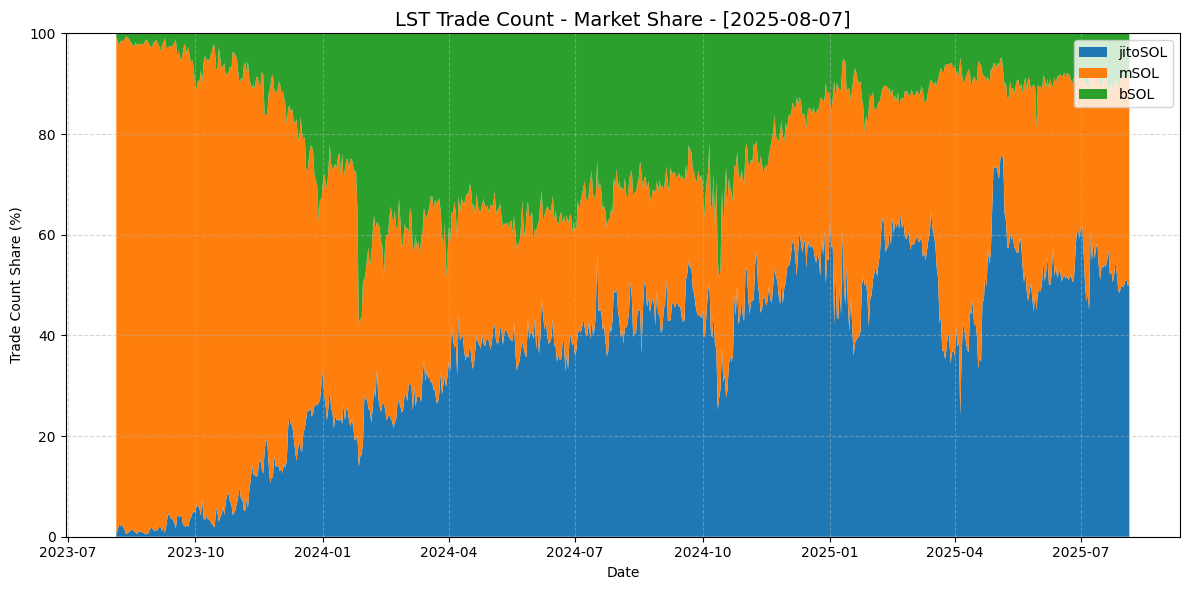

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("lst-metrics.csv")
df['time_bucket'] = pd.to_datetime(df['time_bucket']).dt.date
df_daily = df.groupby('time_bucket').agg({
    'bSOL_trades': 'sum',
    'jitoSOL_trades': 'sum', 
    'mSOL_trades': 'sum'
}).reset_index()

df_daily['total_trades'] = df_daily['bSOL_trades'] + df_daily['jitoSOL_trades'] + df_daily['mSOL_trades']
df_daily['jitoSOL_share'] = (df_daily['jitoSOL_trades'] / df_daily['total_trades']) * 100
df_daily['mSOL_share'] = (df_daily['mSOL_trades'] / df_daily['total_trades']) * 100
df_daily['bSOL_share'] = (df_daily['bSOL_trades'] / df_daily['total_trades']) * 100

df_daily = df_daily.sort_values('time_bucket')

plt.figure(figsize=(12, 6))
plt.stackplot(df_daily['time_bucket'], 
              df_daily['jitoSOL_share'], 
              df_daily['mSOL_share'], 
              df_daily['bSOL_share'],
              labels=['jitoSOL', 'mSOL', 'bSOL'],
              colors=['C0', 'C1', 'C2'])

plt.title("LST Trade Count - Market Share - [2025-08-07]", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Trade Count Share (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [35]:
import pandas as pd

df = pd.read_csv("lst-metrics.csv")
df['time_bucket'] = pd.to_datetime(df['time_bucket'])
df_daily = df.groupby(df['time_bucket'].dt.date).agg({
    'bSOL_trades': 'sum',
    'jitoSOL_trades': 'sum', 
    'mSOL_trades': 'sum'
}).reset_index()

df_daily['total_trades'] = df_daily['bSOL_trades'] + df_daily['jitoSOL_trades'] + df_daily['mSOL_trades']
df_daily['jitoSOL_share'] = (df_daily['jitoSOL_trades'] / df_daily['total_trades']) * 100
df_daily['mSOL_share'] = (df_daily['mSOL_trades'] / df_daily['total_trades']) * 100
df_daily['bSOL_share'] = (df_daily['bSOL_trades'] / df_daily['total_trades']) * 100

latest_date = df['time_bucket'].dt.strftime('%b. %-d, %Y').iloc[-1]
start_date = df['time_bucket'].dt.strftime('%b. %-d, %Y').iloc[0]
timeframe_label = f"{start_date} – {latest_date}"

summary = pd.DataFrame({
    "Timeframe": [timeframe_label] * 3,
    "Total Trades": [
        f"{df_daily['jitoSOL_trades'].sum():,}",
        f"{df_daily['mSOL_trades'].sum():,}",
        f"{df_daily['bSOL_trades'].sum():,}"
    ],
    "Avg Daily Trades": [
        f"{df_daily['jitoSOL_trades'].mean():.0f}",
        f"{df_daily['mSOL_trades'].mean():.0f}",
        f"{df_daily['bSOL_trades'].mean():.0f}"
    ],
    "Peak Daily Trades": [
        f"{df_daily['jitoSOL_trades'].max():,}",
        f"{df_daily['mSOL_trades'].max():,}",
        f"{df_daily['bSOL_trades'].max():,}"
    ],
    "Mean Market Share (%)": [
        f"{df_daily['jitoSOL_share'].mean():.1f}%",
        f"{df_daily['mSOL_share'].mean():.1f}%",
        f"{df_daily['bSOL_share'].mean():.1f}%"
    ],
    "Peak Market Share (%)": [
        f"{df_daily['jitoSOL_share'].max():.1f}%",
        f"{df_daily['mSOL_share'].max():.1f}%",
        f"{df_daily['bSOL_share'].max():.1f}%"
    ],
    "Days Active": [
        f"{(df_daily['jitoSOL_trades'] > 0).sum():,}",
        f"{(df_daily['mSOL_trades'] > 0).sum():,}",
        f"{(df_daily['bSOL_trades'] > 0).sum():,}"
    ]
}, index=["jitoSOL", "mSOL", "bSOL"])

summary.style.set_properties(**{'text-align': 'left'}).set_table_styles([
    {"selector": "th", "props": [("text-align", "left")]}
])

,Timeframe,Total Trades,Avg Daily Trades,Peak Daily Trades,Mean Market Share (%),Peak Market Share (%),Days Active
jitoSOL,"Aug. 5, 2023 – Aug. 5, 2025","36,056,785",49258,"230,788",36.8%,75.6%,732
mSOL,"Aug. 5, 2023 – Aug. 5, 2025","46,464,800",63477,"271,764",42.7%,98.9%,732
bSOL,"Aug. 5, 2023 – Aug. 5, 2025","18,405,959",25145,"140,025",20.4%,57.9%,732


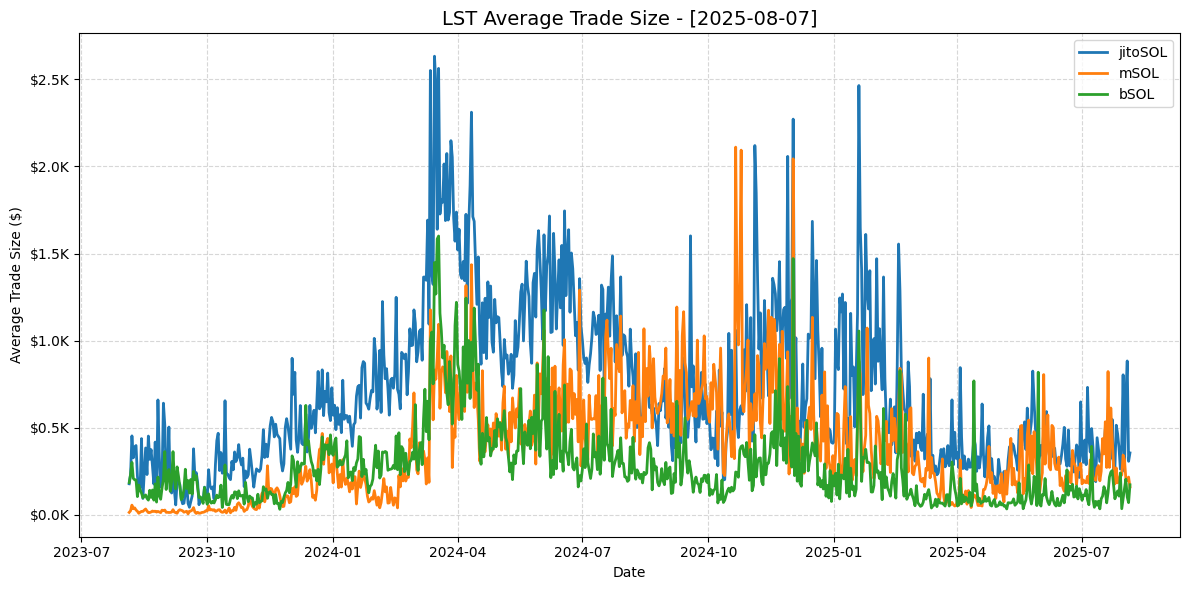

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("lst-metrics.csv")
df['time_bucket'] = pd.to_datetime(df['time_bucket']).dt.date
df_daily = df.groupby('time_bucket').agg({
    'bSOL_avg_trade_size': 'mean',
    'jitoSOL_avg_trade_size': 'mean', 
    'mSOL_avg_trade_size': 'mean'
}).reset_index()

df_daily = df_daily.sort_values('time_bucket')

plt.figure(figsize=(12, 6))
plt.plot(df_daily['time_bucket'], df_daily['jitoSOL_avg_trade_size'], linewidth=2, label='jitoSOL', color='C0')
plt.plot(df_daily['time_bucket'], df_daily['mSOL_avg_trade_size'], linewidth=2, label='mSOL', color='C1')
plt.plot(df_daily['time_bucket'], df_daily['bSOL_avg_trade_size'], linewidth=2, label='bSOL', color='C2')

plt.title("LST Average Trade Size - [2025-08-07]", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Average Trade Size ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e3:.1f}K' if x < 1e6 else f'${x/1e6:.1f}M'))

plt.tight_layout()
plt.show()

In [37]:
import pandas as pd

df = pd.read_csv("lst-metrics.csv")
df['time_bucket'] = pd.to_datetime(df['time_bucket'])
df_daily = df.groupby(df['time_bucket'].dt.date).agg({
    'bSOL_avg_trade_size': 'mean',
    'jitoSOL_avg_trade_size': 'mean', 
    'mSOL_avg_trade_size': 'mean'
}).reset_index()

latest_date = df['time_bucket'].dt.strftime('%b. %-d, %Y').iloc[-1]
start_date = df['time_bucket'].dt.strftime('%b. %-d, %Y').iloc[0]
timeframe_label = f"{start_date} – {latest_date}"

def coefficient_of_variation(series):
    return (series.std() / series.mean()) * 100

summary = pd.DataFrame({
    "Timeframe": [timeframe_label] * 3,
    "Mean Trade Size ($)": [
        f"${df_daily['jitoSOL_avg_trade_size'].mean():,.0f}",
        f"${df_daily['mSOL_avg_trade_size'].mean():,.0f}",
        f"${df_daily['bSOL_avg_trade_size'].mean():,.0f}"
    ],
    "Median Trade Size ($)": [
        f"${df_daily['jitoSOL_avg_trade_size'].median():,.0f}",
        f"${df_daily['mSOL_avg_trade_size'].median():,.0f}",
        f"${df_daily['bSOL_avg_trade_size'].median():,.0f}"
    ],
    "Peak Trade Size ($)": [
        f"${df_daily['jitoSOL_avg_trade_size'].max():,.0f}",
        f"${df_daily['mSOL_avg_trade_size'].max():,.0f}",
        f"${df_daily['bSOL_avg_trade_size'].max():,.0f}"
    ],
    "Standard Deviation ($)": [
        f"${df_daily['jitoSOL_avg_trade_size'].std():,.0f}",
        f"${df_daily['mSOL_avg_trade_size'].std():,.0f}",
        f"${df_daily['bSOL_avg_trade_size'].std():,.0f}"
    ],
    "25th Percentile ($)": [
        f"${df_daily['jitoSOL_avg_trade_size'].quantile(0.25):,.0f}",
        f"${df_daily['mSOL_avg_trade_size'].quantile(0.25):,.0f}",
        f"${df_daily['bSOL_avg_trade_size'].quantile(0.25):,.0f}"
    ]
}, index=["jitoSOL", "mSOL", "bSOL"])

summary.style.set_properties(**{'text-align': 'left'}).set_table_styles([
    {"selector": "th", "props": [("text-align", "left")]}
])

,Timeframe,Mean Trade Size ($),Median Trade Size ($),Peak Trade Size ($),Standard Deviation ($),25th Percentile ($)
jitoSOL,"Aug. 5, 2023 – Aug. 5, 2025",$713,$592,"$2,634",$459,$360
mSOL,"Aug. 5, 2023 – Aug. 5, 2025",$387,$315,"$2,111",$314,$139
bSOL,"Aug. 5, 2023 – Aug. 5, 2025",$274,$217,"$1,601",$233,$112
